# Import Libary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Import Data

In [2]:
data = pd.read_excel('data/Dataset.xlsx')
data.head()

,Provinsi,Pendidikan,Sanitasi,IPM,PLN,Laju Ekonomi,Pendapatan,Kemiskinan
0,ACEH,70.67,77.48,72.80,99.69,4.21,17624,14.75
1,SUMATERA UTARA,77.16,82.30,72.71,98.70,4.73,17917,8.33
2,SUMATERA BARAT,65.96,69.27,73.26,98.82,4.36,16896,6.04
3,RIAU,66.91,84.06,73.52,95.20,4.55,21617,6.84
4,JAMBI,65.85,79.54,72.14,98.39,5.13,22004,7.70


# Normalisasi Min-Max Fitur

#### Bertujuan untuk memberikan nilai yang tidak terlalu besar

In [3]:
columns_to_normalize = ['Pendidikan', 'Sanitasi', 'IPM', 'PLN', 'Laju Ekonomi', 'Pendapatan', 'Kemiskinan']
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

data.head()

,Provinsi,Pendidikan,Sanitasi,IPM,PLN,Laju Ekonomi,Pendapatan,Kemiskinan
0,ACEH,0.651163,0.664757,0.563179,0.995257,0.105112,0.207768,0.458913
1,SUMATERA UTARA,0.782406,0.751029,0.558736,0.977864,0.129957,0.216261,0.170633
2,SUMATERA BARAT,0.555915,0.517809,0.585884,0.979972,0.112279,0.186667,0.067804
3,RIAU,0.575126,0.782531,0.598717,0.916374,0.121357,0.323507,0.103727
4,JAMBI,0.553691,0.701629,0.530602,0.972417,0.149068,0.334725,0.142344


# Extact Fitur

##### Bertujuan untuk melihat fitur yang berpengaruh kepada Target

Fitur Importance on Kemiskinan : [0.20041896 0.12369174 0.23486227 0.18690767 0.07492832 0.17919104]


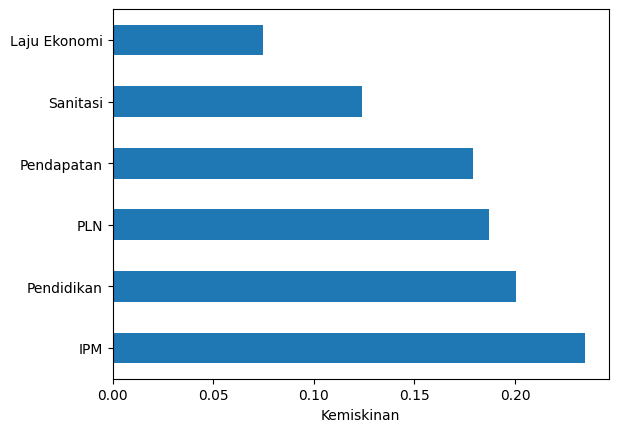

In [4]:
X_Extract_Fitur = data.drop(columns=['Provinsi','Kemiskinan'], axis=1)
y_Extract_Fitur = data['Kemiskinan']

modelExtraFitur = ExtraTreesRegressor()
modelExtraFitur.fit(X_Extract_Fitur, y_Extract_Fitur)

importance = modelExtraFitur.feature_importances_
print("Fitur Importance on Kemiskinan : " + str(importance))

featImportance = pd.Series(modelExtraFitur.feature_importances_, index=X_Extract_Fitur.columns)
featImportance.nlargest(25).plot(kind='barh')
plt.xlabel("Kemiskinan")
plt.show()

# Corelation

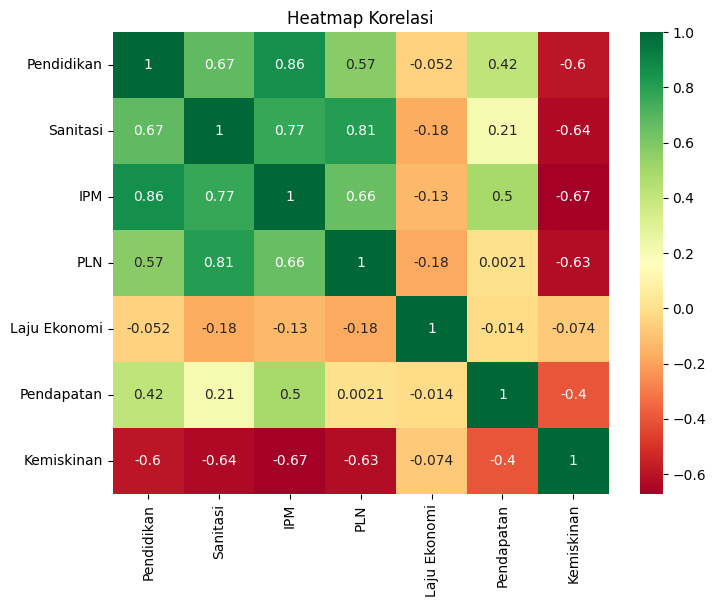

In [5]:
df = data.drop(['Provinsi'], axis=1)
correlation = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='RdYlGn')
plt.title('Heatmap Korelasi')
plt.show()

# Multiple Regression Linear

### OLS Regression

In [6]:
X = data.drop(columns=['Provinsi', 'Kemiskinan'], axis=1)
y = data['Kemiskinan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

modelRegression = LinearRegression()
modelRegression.fit(X_train,y_train)

X = sm.add_constant(X)
ols_model = sm.OLS(y, X)
results = ols_model.fit()

In [7]:
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

lnr = LinearRegression()
lnr.fit(X_train, y_train)
predictions = lnr.predict(X_test)

print('mape : ', mean_absolute_percentage_error(y_test, predictions)*100)

mape :  38.051392587788214


# Result

In [8]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Kemiskinan   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     6.991
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           0.000145
Time:                        20:16:30   Log-Likelihood:                 17.102
No. Observations:                  34   AIC:                            -20.20
Df Residuals:                      27   BIC:                            -9.519
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2019      0.181      6.653   

# Information

#### 1. Uji Simultan

Nilai p-value (0.000145) < α (0.05) maka H0 ditolak. Sehingga dapat disimpulkan bahwa terdapat pengaruh yang signifikan antara variabel prediktor terhadap variabel respons secara simultan.

#### 2. Uji Parsial

- PendudukN -
Nilai p-value (0.601) < α (0.05) maka H0 diterima. Dapat disimpulkan bahwa tidak terdapat pengaruh yang signifikan antara variabel PendudukN terhadap Kemiskinan secara parsial

- IPM -
Nilai p-value (0.568) < α (0.05) maka H0 diterima. Dapat disimpulkan bahwa tidak terdapat pengaruh yang signifikan antara variabel IPM terhadap Kemiskinan secara parsial

- UsiaProduktif -
Nilai p-value (0.991) < α (0.05) maka H0 diterima. Dapat disimpulkan bahwa tidak terdapat pengaruh yang signifikan antara variabel UsiaProduktif terhadap Kemiskinan secara parsial

- PLN -
Nilai p-value (0.030) < α (0.05) maka H0 ditolak. Dapat disimpulkan bahwa terdapat pengaruh yang signifikan antara variabel PLN terhadap Kemiskinan secara parsial

- Kepadatan -
Nilai p-value (0.340) < α (0.05) maka H0 diterima. Dapat disimpulkan bahwa tidak terdapat pengaruh yang signifikan antara variabel Kepadatan terhadap Kemiskinan secara parsial

- PengeluaranN -
Nilai p-value (0.153) < α (0.05) maka H0 diterima. Dapat disimpulkan bahwa tidak terdapat pengaruh yang signifikan antara variabel PengeluaranN terhadap Kemiskinan secara parsial

#### 3. Koefisien Determinasi

Koefisien determinasi sebesar 0.558 artinya variabel prediktor (PendudukN, IPM, UsiaProduktif, PLN, Kepadatan, PengeluaranN) mempengaruhi variabel respons (Kemiskinan) sebesar 55,8%, sedangkan sisanya dipengaruhi variabel lain di luar model.